In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우 난 윈도우지만...
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드
preseason_df = pd.read_csv("./62540_KBO_prediction_data/Pre_Season_Batter.csv")

regular_season_df = pd.read_csv("./62540_KBO_prediction_data/Regular_Season_Batter.csv")

print(preseason_df.shape) # 데이터 크기 확인
display(preseason_df.head()) # 헤드

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


# 1.1 프리시즌 데이터 분석

In [3]:
display(preseason_df.describe()) # 프리시즌의 기초통계량

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


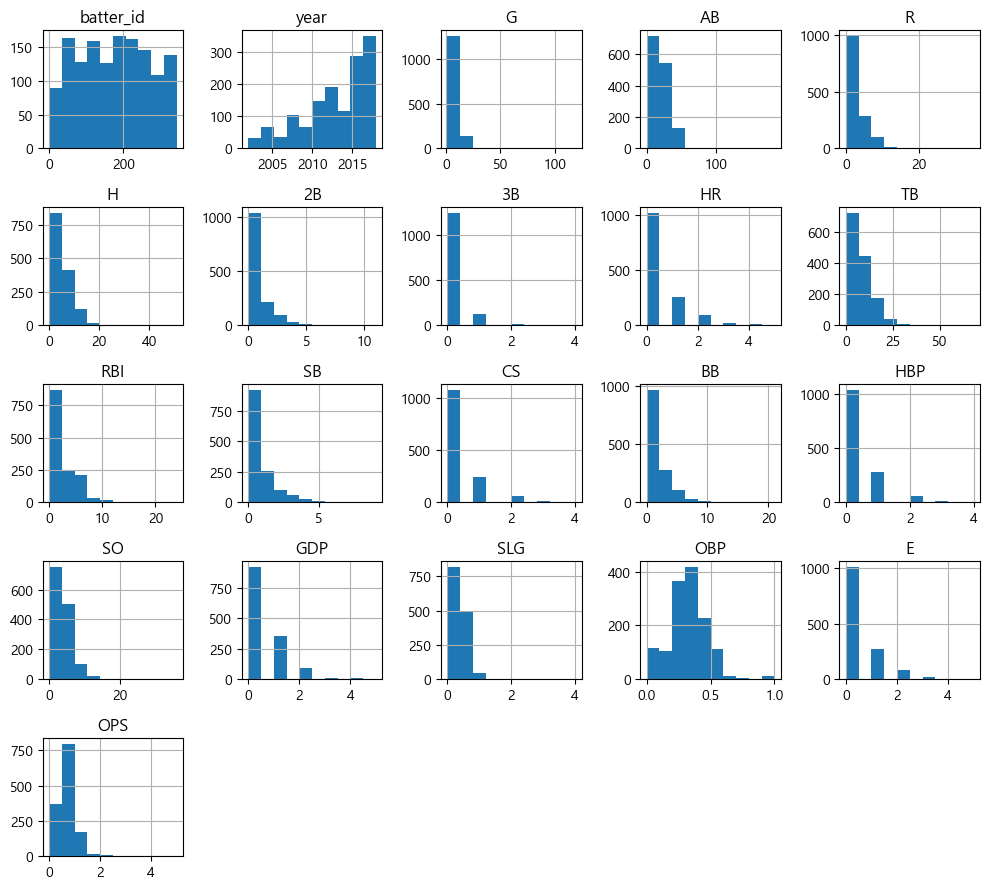

In [4]:
preseason_df.hist(figsize=(10,9)) # 히스토그램생성
plt.tight_layout()
plt.show()
# 2B, 3B, AB 등등의 대부분의 값이 0에 가깝다

In [5]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).transpose().loc[:,2002:] # 2002년부터 보기

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


1. 2002년부터 정규시즌의 선수와 프리시즌의 선수의 수가 점점 늘고 있음을 볼 수 있다. 
2. 또한 정규/프리의 비율이 점점 늘고있다.

In [6]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + \
                               regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합  intersection()는 두개의 데이터집합에서 공통된 요소를 반환
intersection_idx = list(set(regular_season_df['new_idx']). \
                        intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) 

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(
    lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

1. 정규시즌과 프리시즌의 성적간의 상관관계를 위해 타자별로 새로운 인덱스 생성
2. 생성된 인덱스끼리 교집합을 하여 그 결과로 교집합에만 존재하는 데이터만으로 인덱스를 새로 정렬함

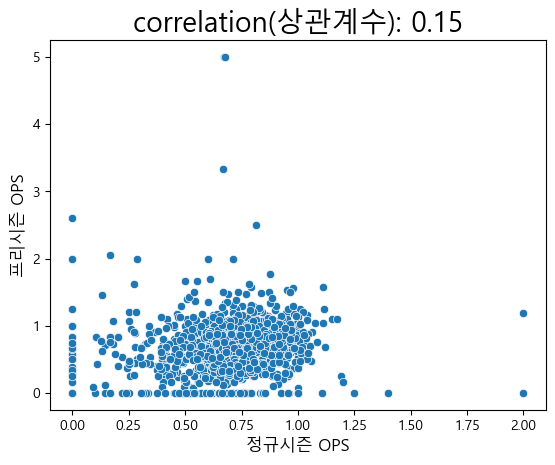

In [7]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
# sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS']) x 랑 y값을 지정해줘야 오류안남
sns.scatterplot(x=regular_season_new['OPS'] ,y=preseason_new['OPS'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("정규시즌 OPS",fontsize=12)
plt.ylabel("프리시즌 OPS",fontsize=12)
plt.show()

1. 선형적인 산점도가 안보인다 = 서로의 연관성이 매우 낮다
2. 데이터 분석의 목적이 정규시즌이기 때문에 프리시즌을 분석할 필요가 매우 낮아진다.

# 1.2 정규시즌 데이터 분석

In [8]:
display(regular_season_df.shape, regular_season_df.head(),regular_season_df.describe())
# 정규시즌의 데이터 갯수 및 헤더 및 기초통계량 산출

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


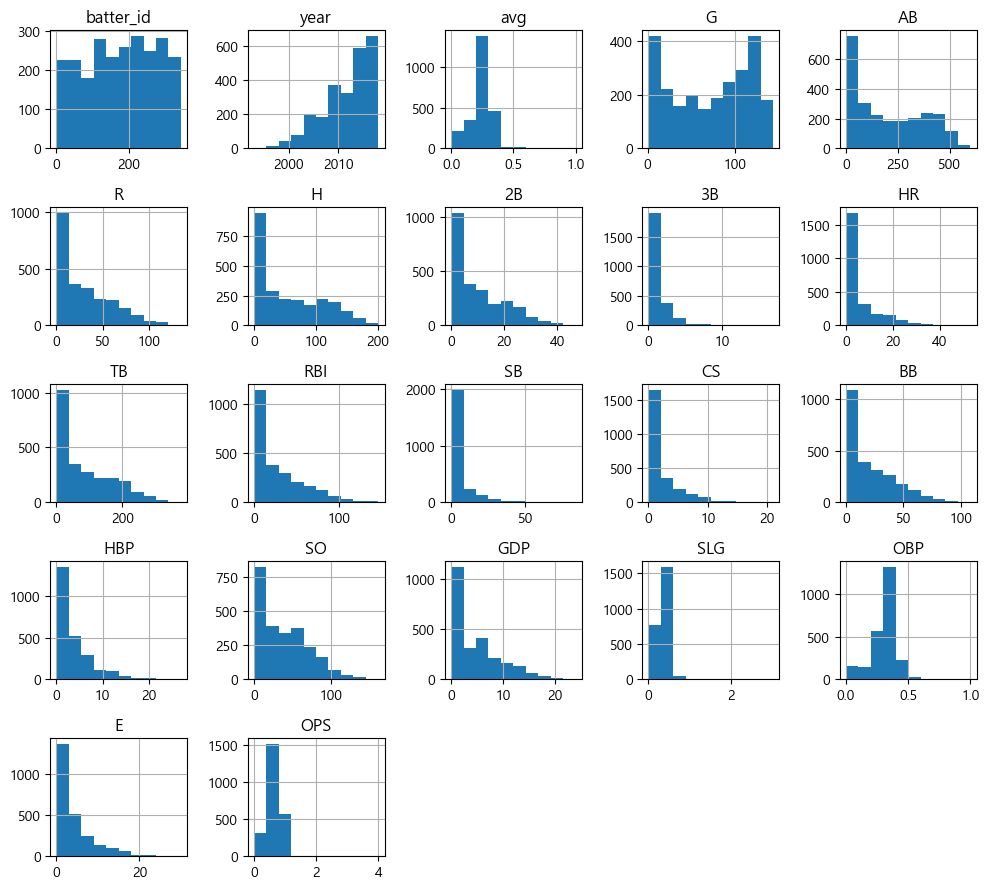

In [9]:
# 정규시즌의 히스토그램
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정

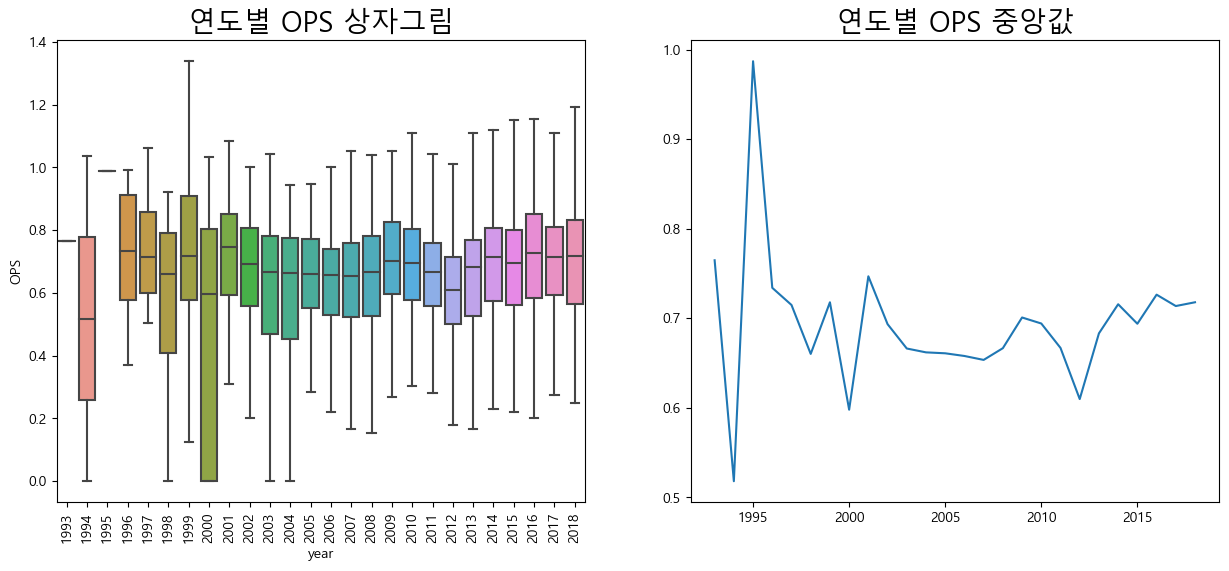

In [10]:
# 출루율+장타율

plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
# 박스 플롯 생성
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
# 꺽은선 그래프 생성 | 값이 높을 수록 OPS의 평균값이 높다.
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

1. 연도별 OPS를 볼때 변동폭이 큰 것을 확인 할 수 있다. 
2. 이유는 각 연도별 경기 횟수를 보면 알 수 있다.
3. 2000년도 이전의 기록수가 매우 적다.

In [11]:
#각 연도별 경기 횟수
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


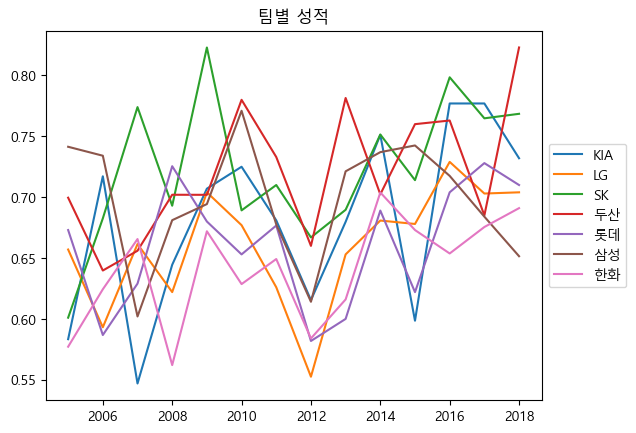

In [12]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index = ['team'], columns='year', values='OPS', 
                                             aggfunc='median')
# 2005년 이후에 결측치가 있는 팀 제거
team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis = 1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T) # 결측치 제거한 인덱스로 그래프 설정
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
          loc='center left', bbox_to_anchor = (1, 0.5)) # 범례 설정
plt.title('팀별 성적')
plt.show()

In [13]:
# 선수의 몸무게 및 키가 성적에 영향이 있는지 확인

import re
# 정규시즌의 키와 몸무게의 값을 따로 분리
regular_season_df['weight']= regular_season_df['height/weight'].apply(
                                lambda x: int(re.findall('\d+',x.split('/')[1])[0])if pd.notnull(x) else x) 
regular_season_df['height']= regular_season_df['height/weight'].apply(
                                lambda x: int(re.findall('\d+',x.split('/')[0])[0])if pd.notnull(x) else x) 

print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


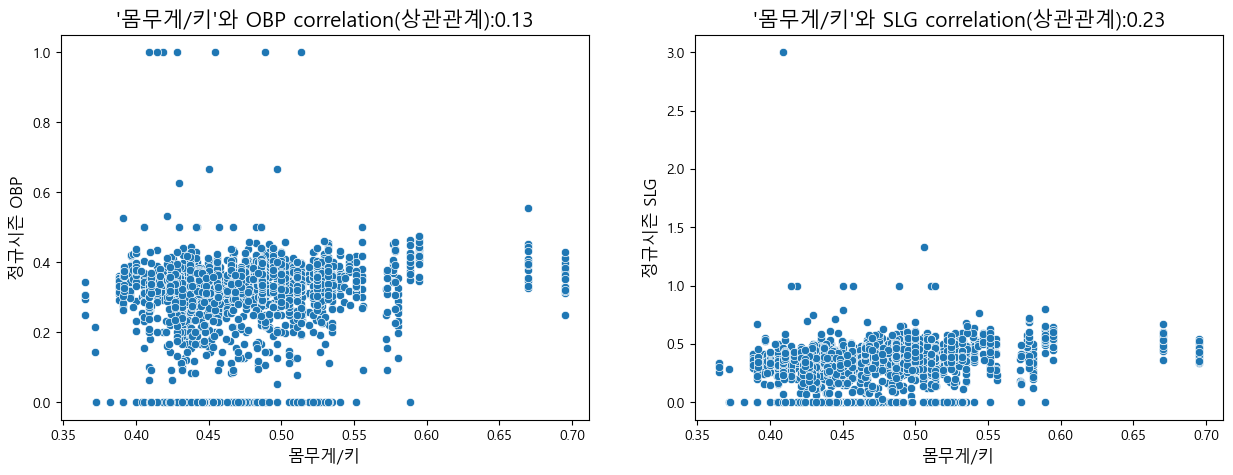

In [14]:
# 몸무게 / 키 vjtpsxm
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(x = regular_season_df['weight_per_height'],y =  regular_season_df['OBP'])

plt.title("'몸무게/키'와 OBP correlation(상관관계):" + str(np.round(correlation,2)), fontsize = 15)
plt.ylabel('정규시즌 OBP', fontsize =12) # y 축
plt.xlabel('몸무게/키', fontsize = 12) # x 축
plt.subplot(1,2,2)

#정규시즌과 프리시즌의 상관관계
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(x= regular_season_df['weight_per_height'], y =regular_season_df['SLG'])

plt.title("'몸무게/키'와 SLG correlation(상관관계):" + str(np.round(correlation,2)), fontsize = 15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()
# 고르게 분포해 있는걸 보면 몸무게와 키는 장타율에 영향을 주지않는다.

In [15]:
regular_season_df['position'].value_counts() # 포지션별 갯수 
# 첫번째줄은 내야수는 맞는데 우투인지 우타인지 구분이 힘들다

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [16]:
# position
regular_season_df['pos'] = regular_season_df['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)
# 우타 좌타 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)
display(regular_season_df['position'][0], regular_season_df['hit_way'][0], regular_season_df['pos'][0])
print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

'내야수(우투우타)'

'우타'

'내야수'

내야수(우투우타) 내야수 우타


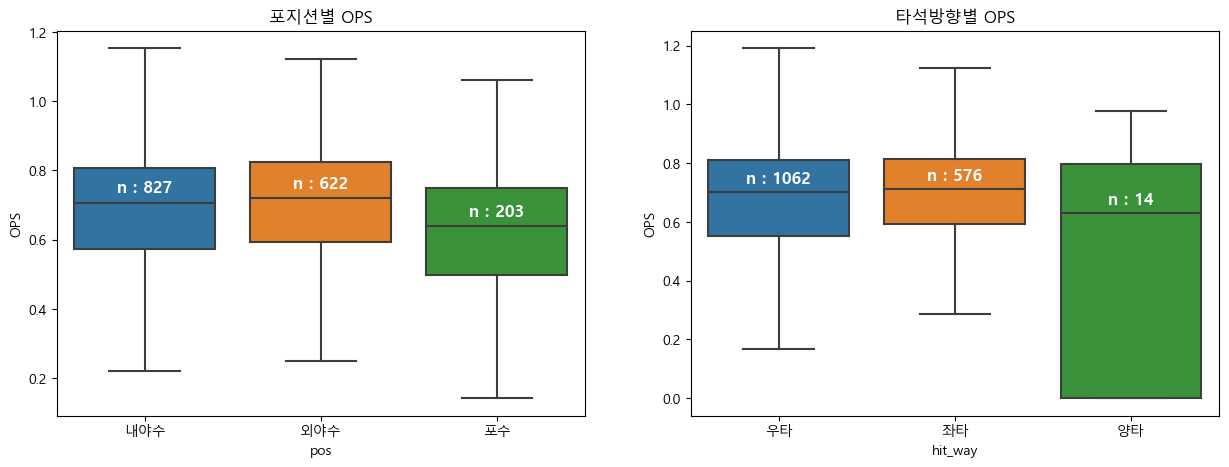

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos', y='OPS', data=regular_season_df, showfliers=False)

# 포지션별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# 포지션별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()
# 관측수
for i in nobs : nobs[i]= "n : " + str(nobs[i])

xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels(): 
    ax.text(xticks_labels.index(label.get_text()),
           medians[label.get_text()]+ 0.03, nobs[label.get_text()],
           horizontalalignment='center', size = 'large', color = 'w', weight = 'semibold')
ax.set_title('포지션별 OPS')

### 두번째 박스 플롯 ###
plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way', y='OPS',data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
#관측수
for i in nobs: nobs[i] = "n : " + str(nobs[i])

#그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에해당하는 text의 값이다.
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

1. 외야수와 내야수의 성적은 큰 차이가 없다
2. 포수의 OPS는 다른 포지션보다 수치가 작다.
3. 양손잡이의 OPS가 작지만 관측치가 13개 밖에 되지않는다.

In [20]:
regular_season_df['career'].head()
# 한국인은 초중고 정보가 나오고
# 외국인은 다르게 국가와 대학교 순서로 나온다

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [21]:
foreign_country = regular_season_df['career'].apply( lambda x: x.replace('-', ' ').split(' ')[0])

foreign_country_list = list(set(foreign_country.apply( lambda x: np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [ x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['쿠바', '캐나다', '도미니카', '미국', '네덜란드']